## Load Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
sns.set()
seed = 1234

## Load Data

In [13]:
from data_access_sdk_python.reader import DataSetReader
from datetime import date
reader = DataSetReader()
df = reader.load(data_set_id="5c54dcf3830582152d0163ce", ims_org="BD795BD15C3E946E0A495CF5@AdobeOrg",batch_id="2767d0f1028147d49befa3c7f355066f")
df.head()

INFO:adal-python:b27a3da3-174d-444d-a6bc-8574850fcb48 - TokenRequest:Getting token with client credentials.
INFO:adal-python:b27a3da3-174d-444d-a6bc-8574850fcb48 - OAuth2Client:Get Token Server returned this correlation_id: b27a3da3-174d-444d-a6bc-8574850fcb48
INFO:DataAccessSDK:There are 1 file(s) in this dataset/batch, limit_files: all
INFO:azure.datalake.store.core:closing stream
INFO:DataAccessSDK:#1/1 batch file platform/5c54dcf3830582152d0163ce/datasetViewId=5c54dcf3830582152d0163cf/batchId=2767d0f1028147d49befa3c7f355066f/72657461696C.csv : 6435 rows read. 122.72 MB memory used.
INFO:DataAccessSDK:6435 rows total in dataframe


,date,store,storeType,weeklySales,storeSize,temperature,regionalFuelPrice,markDown,cpi,unemployment,isHoliday
0,2/5/10,1,A,1643690.90,151315,42.31,2.572,0.0,211.096358,8.106,False
1,2/5/10,2,A,2136989.46,202307,40.19,2.572,0.0,210.752605,8.324,False
2,2/5/10,3,B,461622.22,37392,45.71,2.572,0.0,214.424881,7.368,False
3,2/5/10,4,A,2135143.87,205863,43.76,2.598,0.0,126.442065,8.623,False
4,2/5/10,5,B,317173.10,34875,39.70,2.572,0.0,211.653972,6.566,False


## Summarize the Data

### Dataset Dimensions

In [14]:
print("We should see 6435 instances and 11 attributes", df.shape)

We should see 6435 instances and 11 attributes (6435, 11)


### Peeking at the Data

In [15]:
df.head(20)

,date,store,storeType,weeklySales,storeSize,temperature,regionalFuelPrice,markDown,cpi,unemployment,isHoliday
0,2/5/10,1,A,1643690.90,151315,42.31,2.572,0.0,211.096358,8.106,False
1,2/5/10,2,A,2136989.46,202307,40.19,2.572,0.0,210.752605,8.324,False
2,2/5/10,3,B,461622.22,37392,45.71,2.572,0.0,214.424881,7.368,False
3,2/5/10,4,A,2135143.87,205863,43.76,2.598,0.0,126.442065,8.623,False
4,2/5/10,5,B,317173.10,34875,39.70,2.572,0.0,211.653972,6.566,False
5,2/5/10,6,A,1652635.10,202505,40.43,2.572,0.0,212.622352,7.259,False
6,2/5/10,7,B,496725.44,70713,10.53,2.580,0.0,189.381697,9.014,False
7,2/5/10,8,A,1004137.09,155078,34.14,2.572,0.0,214.471451,6.299,False
8,2/5/10,9,B,549505.55,125833,38.01,2.572,0.0,214.655459,6.415,False
9,2/5/10,10,B,2193048.75,126512,54.34,2.962,0.0,126.442065,9.765,False


### Statistical Summary

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
date                 6435 non-null object
store                6435 non-null int64
storeType            6435 non-null object
weeklySales          6435 non-null float64
storeSize            6435 non-null int64
temperature          6435 non-null float64
regionalFuelPrice    6435 non-null float64
markDown             6435 non-null float64
cpi                  6435 non-null float64
unemployment         6435 non-null float64
isHoliday            6435 non-null bool
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 509.1+ KB


In [17]:
df.describe()

,store,weeklySales,storeSize,temperature,regionalFuelPrice,markDown,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,130287.600000,60.663782,3.358607,6267.753417,171.578394,7.999151
std,12.988182,5.643666e+05,63117.022465,18.444933,0.459020,14269.377364,39.356712,1.875885
min,1.000000,2.099862e+05,34875.000000,-2.060000,2.472000,0.000000,126.064000,3.879000
25%,12.000000,5.533501e+05,70713.000000,47.460000,2.933000,0.000000,131.735000,6.891000
50%,23.000000,9.607460e+05,126512.000000,62.670000,3.445000,0.000000,182.616521,7.874000
75%,34.000000,1.420159e+06,202307.000000,74.940000,3.735000,6844.640000,212.743293,8.622000
max,45.000000,3.818686e+06,219622.000000,100.140000,4.468000,160510.610000,227.232807,14.313000


### Distribution of storeTypes

In [18]:
df.groupby('storeType').size() / len(df['date'].unique())

storeType
A    22.0
B    17.0
C     6.0
dtype: float64

## Data Visualization

### Range of weeklySales for each of 45 stores

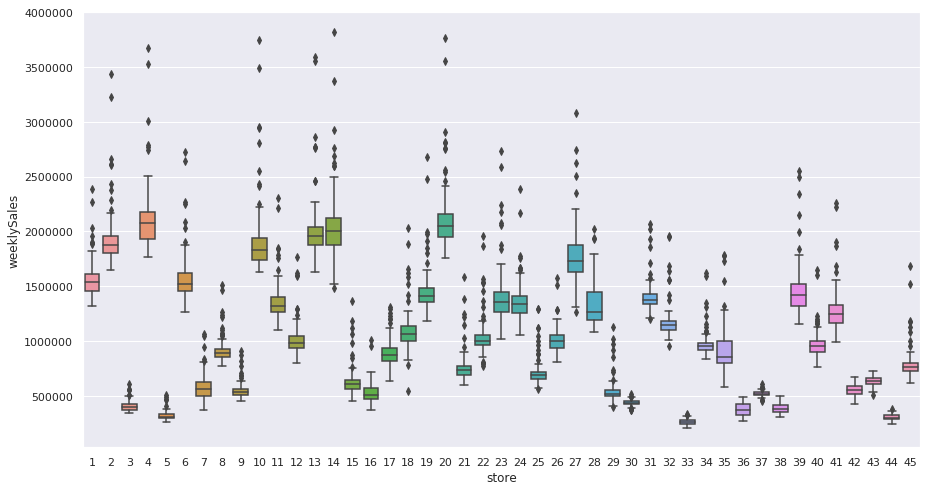

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(x="store", y="weeklySales", data=df)

### Plot weeklySales for subset of stores

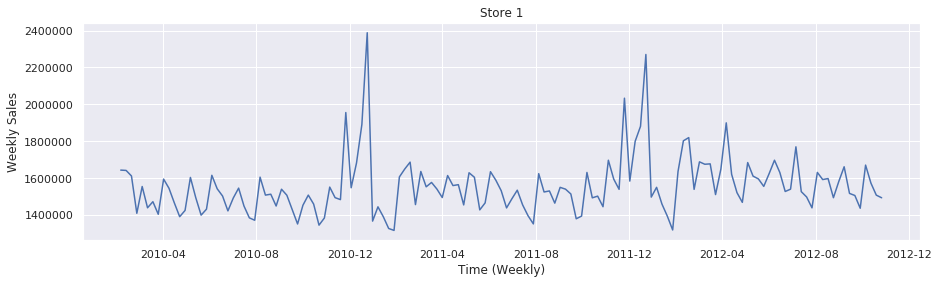

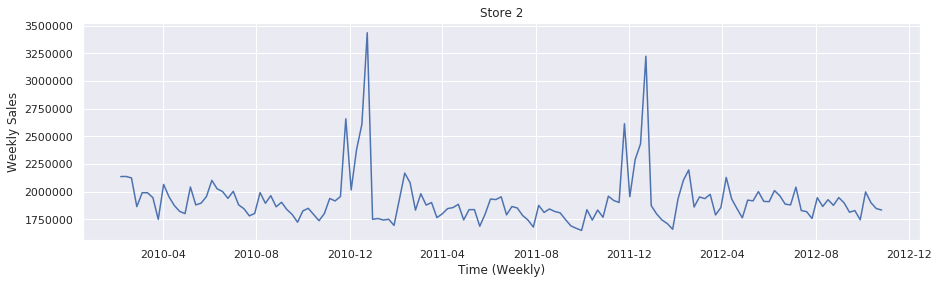

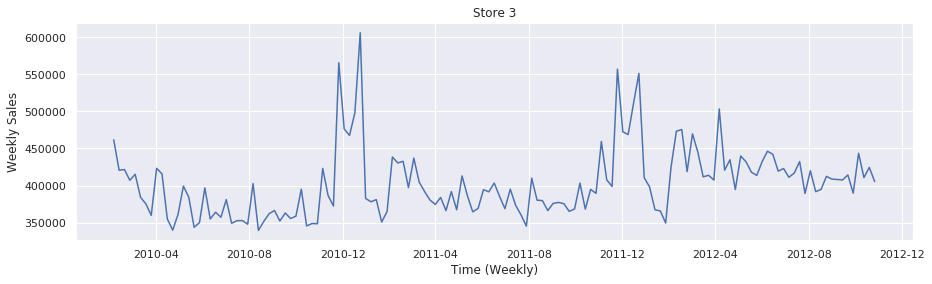

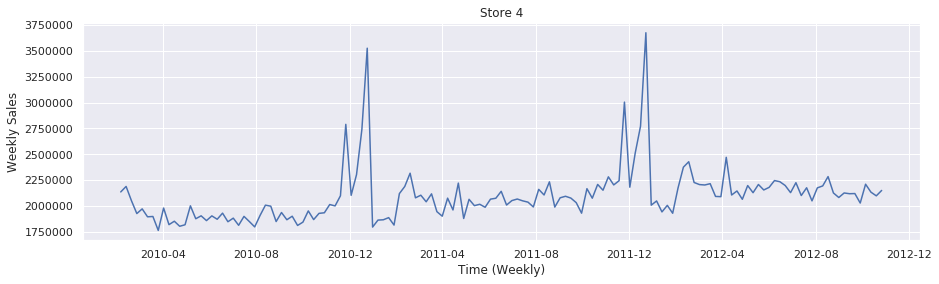

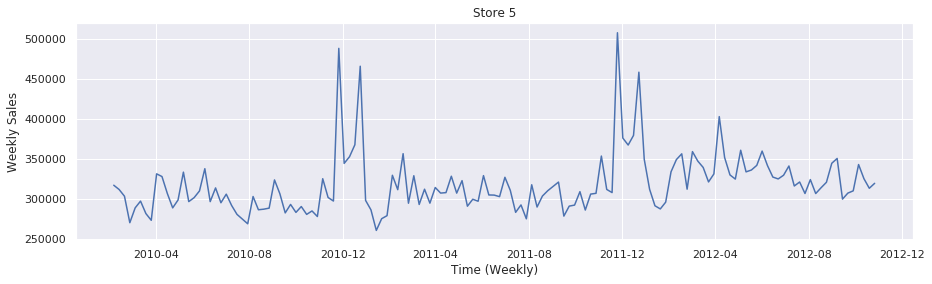

In [20]:
for store in list(range(1, 6)):
    plt.figure(figsize=(15,4))
    plt.plot(pd.to_datetime(df['date'].unique()), df[df['store'] == store]['weeklySales'])
    plt.title("Store " + str(store))
    plt.ylabel('Weekly Sales')
    plt.xlabel('Time (Weekly)')

### Correlation Matrix of Features against Weekly_Sales for a subset of Store

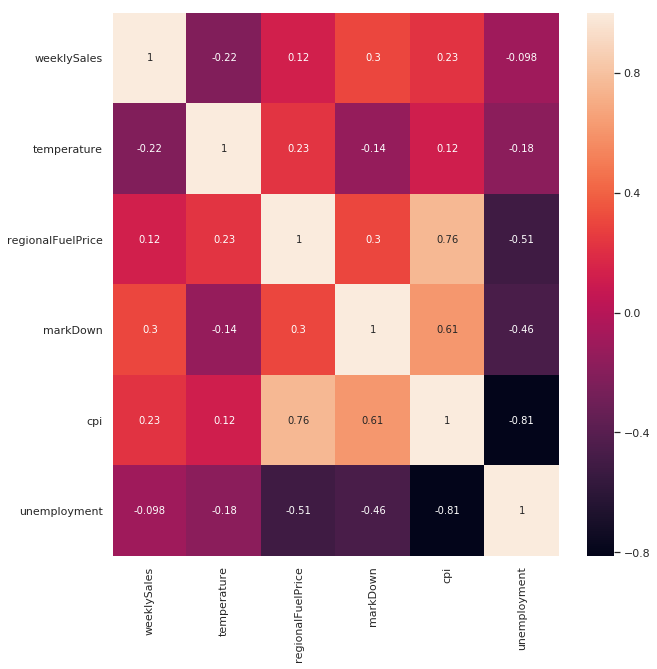

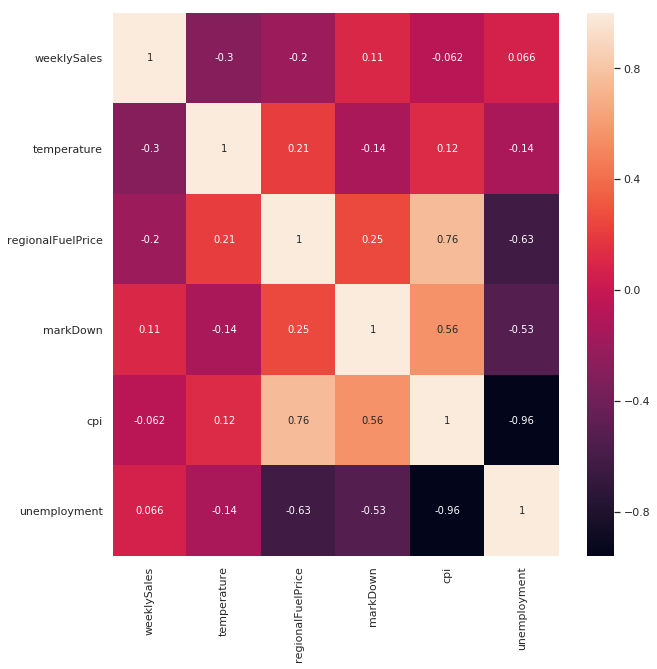

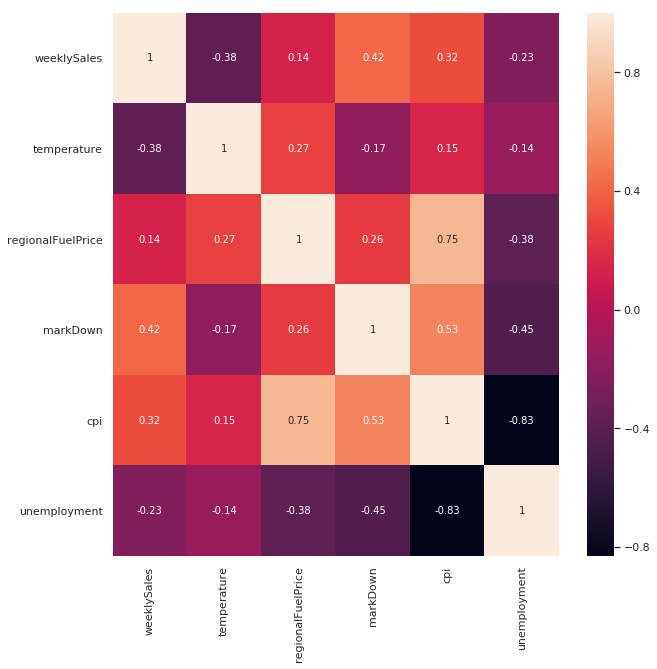

In [21]:
for store in list(range(1, 4)):
    plt.figure(figsize=(10,10))
    sns.heatmap(df[df['store'] == store].drop(['date','store', 'storeType', 'storeSize', 'isHoliday'], 
                                                axis=1).corr(), annot=True)

## Feature Engineering

### Add week and year columns

In [22]:
df.date = pd.to_datetime(df.date)
df['week'] = df.date.dt.week
df['year'] = df.date.dt.year

### Convert storeType column to indicator variable

In [23]:
df = pd.concat([df, pd.get_dummies(df['storeType'])], axis=1)
df.drop('storeType', axis=1, inplace=True)

### Convert isHoliday to numeric

In [24]:
df['isHoliday'] = df['isHoliday'].astype(int)

### Predict weeklySales for next week
#### Create a new variable for previous weeklySales
#### Compute difference between weeklySales at t and t-1

In [25]:
df['weeklySalesAhead'] = df.shift(-45)['weeklySales']
df['weeklySalesLag'] = df.shift(45)['weeklySales']
df['weeklySalesDiff'] = (df['weeklySales'] - df['weeklySalesLag']) / df['weeklySalesLag']
df.head()

,date,store,weeklySales,storeSize,temperature,regionalFuelPrice,markDown,cpi,unemployment,isHoliday,week,year,A,B,C,weeklySalesAhead,weeklySalesLag,weeklySalesDiff
0,2010-02-05,1,1643690.90,151315,42.31,2.572,0.0,211.096358,8.106,0,5,2010,1,0,0,1641957.44,NaN,NaN
1,2010-02-05,2,2136989.46,202307,40.19,2.572,0.0,210.752605,8.324,0,5,2010,1,0,0,2137809.50,NaN,NaN
2,2010-02-05,3,461622.22,37392,45.71,2.572,0.0,214.424881,7.368,0,5,2010,0,1,0,420728.96,NaN,NaN
3,2010-02-05,4,2135143.87,205863,43.76,2.598,0.0,126.442065,8.623,0,5,2010,1,0,0,2188307.39,NaN,NaN
4,2010-02-05,5,317173.10,34875,39.70,2.572,0.0,211.653972,6.566,0,5,2010,0,1,0,311825.70,NaN,NaN


In [26]:
df.dropna(0, inplace=True)

In [27]:
df.dropna()

,date,store,weeklySales,storeSize,temperature,regionalFuelPrice,markDown,cpi,unemployment,isHoliday,week,year,A,B,C,weeklySalesAhead,weeklySalesLag,weeklySalesDiff
45,2010-02-12,1,1641957.44,151315,38.51,2.548,0.00,211.242170,8.106,1,6,2010,1,0,0,1611968.17,1643690.90,-0.001055
46,2010-02-12,2,2137809.50,202307,38.49,2.548,0.00,210.897994,8.324,1,6,2010,1,0,0,2124451.54,2136989.46,0.000384
47,2010-02-12,3,420728.96,37392,47.93,2.548,0.00,214.574792,7.368,1,6,2010,0,1,0,421642.19,461622.22,-0.088586
48,2010-02-12,4,2188307.39,205863,28.84,2.573,0.00,126.496258,8.623,1,6,2010,1,0,0,2049860.26,2135143.87,0.024899
49,2010-02-12,5,311825.70,34875,39.81,2.548,0.00,211.800470,6.566,1,6,2010,0,1,0,303447.57,317173.10,-0.016860
50,2010-02-12,6,1606283.86,202505,40.57,2.548,0.00,212.770042,7.259,1,6,2010,1,0,0,1567138.07,1652635.10,-0.028047
51,2010-02-12,7,524104.92,70713,25.90,2.572,0.00,189.464273,9.014,1,6,2010,0,1,0,506760.54,496725.44,0.055120
52,2010-02-12,8,994801.40,155078,33.34,2.548,0.00,214.621419,6.299,1,6,2010,1,0,0,963960.37,1004137.09,-0.009297
53,2010-02-12,9,552677.48,125833,37.08,2.548,0.00,214.805653,6.415,1,6,2010,0,1,0,511327.90,549505.55,0.005772
54,2010-02-12,10,2176028.52,126512,49.96,2.828,0.00,126.496258,9.765,1,6,2010,0,1,0,2113432.58,2193048.75,-0.007761


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 45 to 6389
Data columns (total 18 columns):
date                 6345 non-null datetime64[ns]
store                6345 non-null int64
weeklySales          6345 non-null float64
storeSize            6345 non-null int64
temperature          6345 non-null float64
regionalFuelPrice    6345 non-null float64
markDown             6345 non-null float64
cpi                  6345 non-null float64
unemployment         6345 non-null float64
isHoliday            6345 non-null int64
week                 6345 non-null int64
year                 6345 non-null int64
A                    6345 non-null uint8
B                    6345 non-null uint8
C                    6345 non-null uint8
weeklySalesAhead     6345 non-null float64
weeklySalesLag       6345 non-null float64
weeklySalesDiff      6345 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(5), uint8(3)
memory usage: 811.7 KB


## Training and Verification

### Split data to training and test set

In [29]:
df = df.set_index(df.date)
df.drop('date', axis=1, inplace=True)

train = df['2010-02-12':'2012-04-06']
test = df['2012-04-13':]

In [30]:
X_train = train.drop('weeklySalesAhead', axis=1).values
y_train = train['weeklySalesAhead'].values

X_test = test.drop('weeklySalesAhead', axis=1).values
y_test = test['weeklySalesAhead'].values

### Spot Check Algorithms

In [31]:
models = []
models.append(('LR', linear_model.LinearRegression(fit_intercept=False)))
models.append(('DT', tree.DecisionTreeRegressor(random_state=seed)))
models.append(('RF', RandomForestRegressor(random_state=seed)))
models.append(('GB', GradientBoostingRegressor(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))

### Gradient Boosting Regressor is the best performer

In [32]:
model = GradientBoostingRegressor(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
test['prediction'] = y_pred

### Visualize Predictions

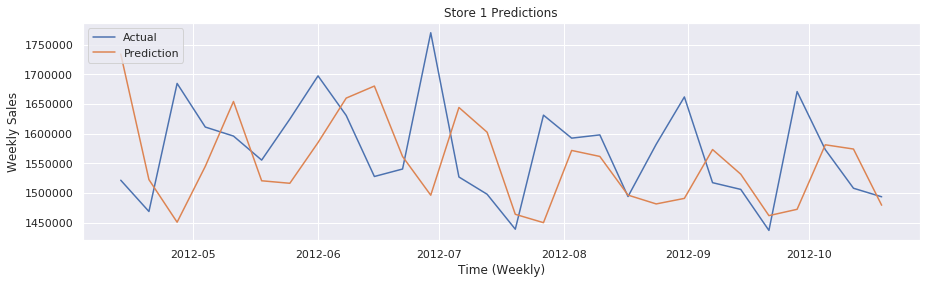

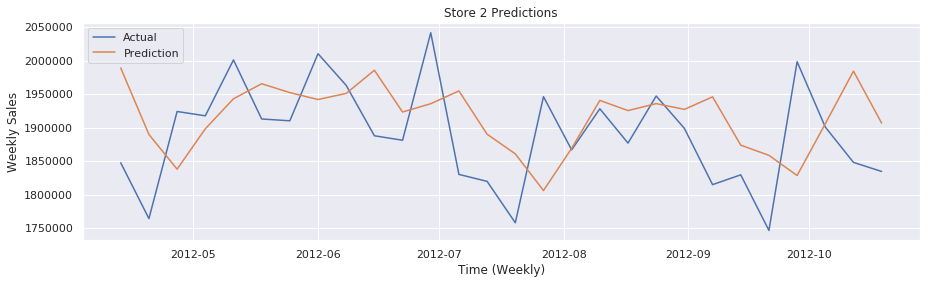

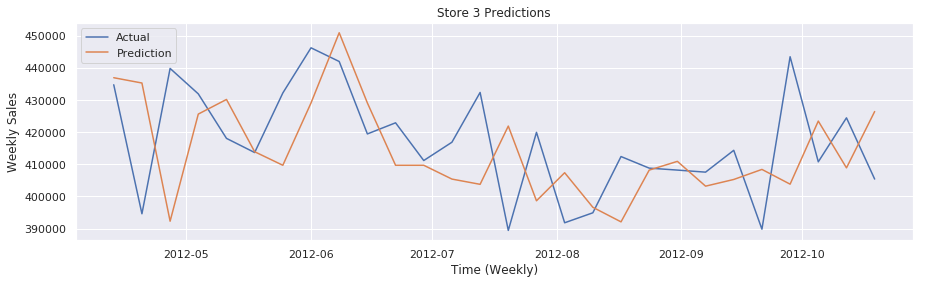

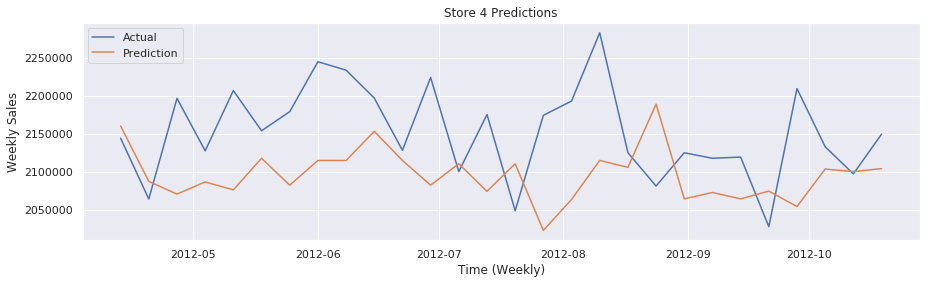

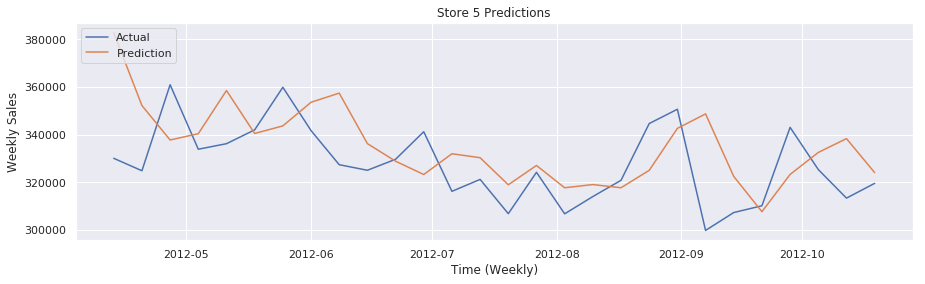

In [34]:
for store in list(range(1, 6)):
    plt.figure(figsize=(15,4))
    plt.plot(test.index.unique(), (test[test['store'] == store]['weeklySalesAhead'].values), label='Actual')
    plt.plot(test.index.unique(), (test[test['store'] == store]['prediction'].values), label='Prediction')
    plt.title('Store ' + str(store) + ' Predictions')
    plt.ylabel('Weekly Sales')
    plt.xlabel('Time (Weekly)')
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)